In [1]:
import pickle 
import os
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms import community
from fa2_modified import ForceAtlas2
from collections import Counter
import seaborn as sns
from matplotlib.colors import LogNorm

G = pickle.load(open('G_politicans_final.pickle', 'rb'))

In [2]:
H = G.to_undirected()
list(nx.isolates(H))

[]

In [3]:
# Initialize ForceAtlas2 layout
forceatlas2 = ForceAtlas2(
    # Behavior alternatives
    outboundAttractionDistribution=True,  # Dissuade hubs
    linLogMode=False,  # linear attraction (default)
    adjustSizes=False,  # Prevent overlap
    edgeWeightInfluence=1.0,

    # Performance and scaling
    jitterTolerance=1.0,  # Tolerance
    barnesHutOptimize=True,  # Optimize for larger graphs
    barnesHutTheta=1.2,
    scalingRatio=4.0,
    strongGravityMode=False,
    gravity=0.8,
    # Log
    verbose=True
)

# Apply the ForceAtlas2 layout to the graph
positions = forceatlas2.forceatlas2_networkx_layout(H, iterations=100)

100%|██████████| 100/100 [05:56<00:00,  3.56s/it]

BarnesHut Approximation  took  36.67  seconds
Repulsion forces  took  316.01  seconds
Gravitational forces  took  0.47  seconds
Attraction forces  took  0.24  seconds
AdjustSpeedAndApplyForces step  took  1.48  seconds


C:\Users\Mathilde\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\networkx\drawing\nx_pylab.py:433: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


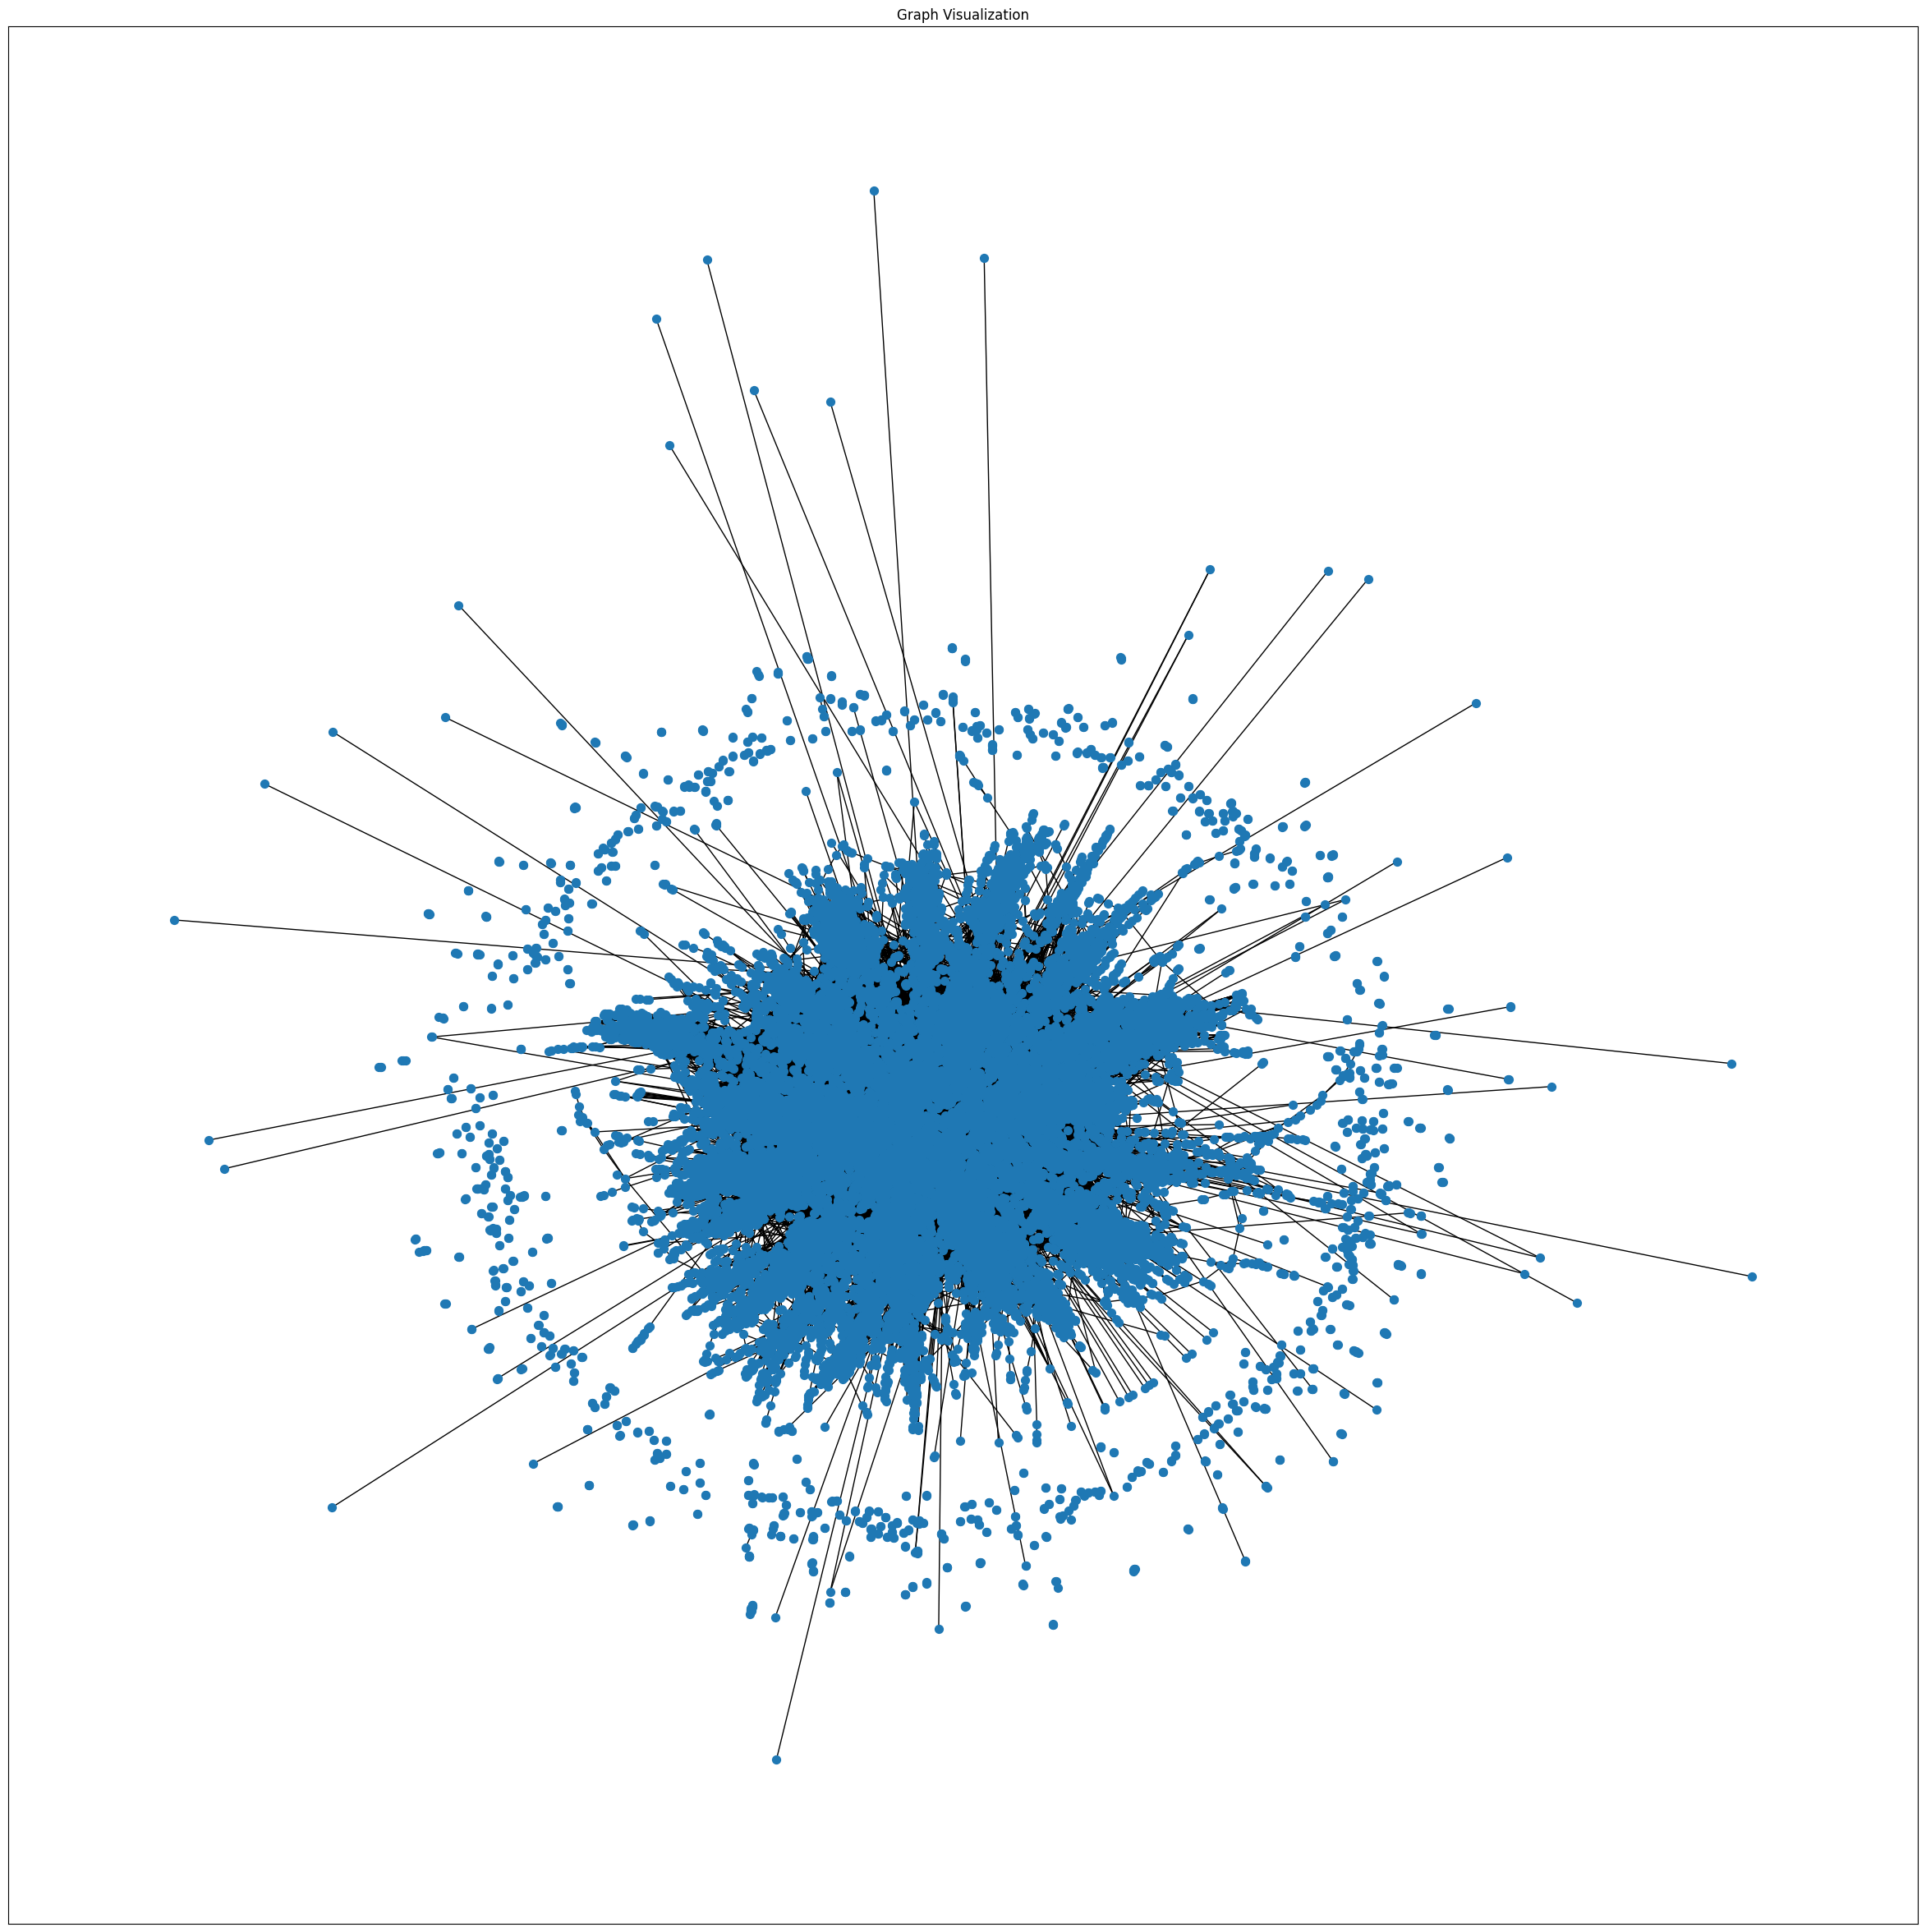

In [4]:
# Plot the graph
plt.figure(figsize=(30, 30))
nx.draw_networkx(
    H, pos=positions, with_labels=False, node_size=50, cmap=plt.cm.jet
)
plt.title("Graph Visualization")
plt.show()

# Party

In [6]:
P = H.copy()

# color nodes after party ['Democratic', 'Republican', 'Libertarian', 'Green', 'Independent', 'Socialist']
colors = []
for node in P.nodes():
    if P.nodes[node]['party'] == 'Democratic':
        colors.append('blue')
    elif P.nodes[node]['party'] == 'Republican':
        colors.append('red')
    elif P.nodes[node]['party'] == 'Libertarian':
        colors.append('yellow')
    elif P.nodes[node]['party'] == 'Green':
        colors.append('green')
    elif P.nodes[node]['party'] == 'Independent':
        colors.append('purple')
    elif P.nodes[node]['party'] == 'Socialist':
        colors.append('pink')
    else:
        colors.append('black')   

In [7]:
# Initialize ForceAtlas2 layout
forceatlas2 = ForceAtlas2(
    # Behavior alternatives
    outboundAttractionDistribution=True,  # Dissuade hubs
    linLogMode=False,  # linear attraction (default)
    adjustSizes=False,  # Prevent overlap
    edgeWeightInfluence=1.0,

    # Performance and scaling
    jitterTolerance=1.0,  # Tolerance
    barnesHutOptimize=True,  # Optimize for larger graphs
    barnesHutTheta=1.2,
    scalingRatio=4.0,
    strongGravityMode=False,
    gravity=0.8,
    # Log
    verbose=True
)

# Apply the ForceAtlas2 layout to the graph
positions = forceatlas2.forceatlas2_networkx_layout(P, iterations=100)

100%|██████████| 100/100 [05:36<00:00,  3.37s/it]

BarnesHut Approximation  took  37.76  seconds
Repulsion forces  took  295.00  seconds
Gravitational forces  took  0.35  seconds
Attraction forces  took  0.37  seconds
AdjustSpeedAndApplyForces step  took  1.73  seconds


C:\Users\Mathilde\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\networkx\drawing\nx_pylab.py:433: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


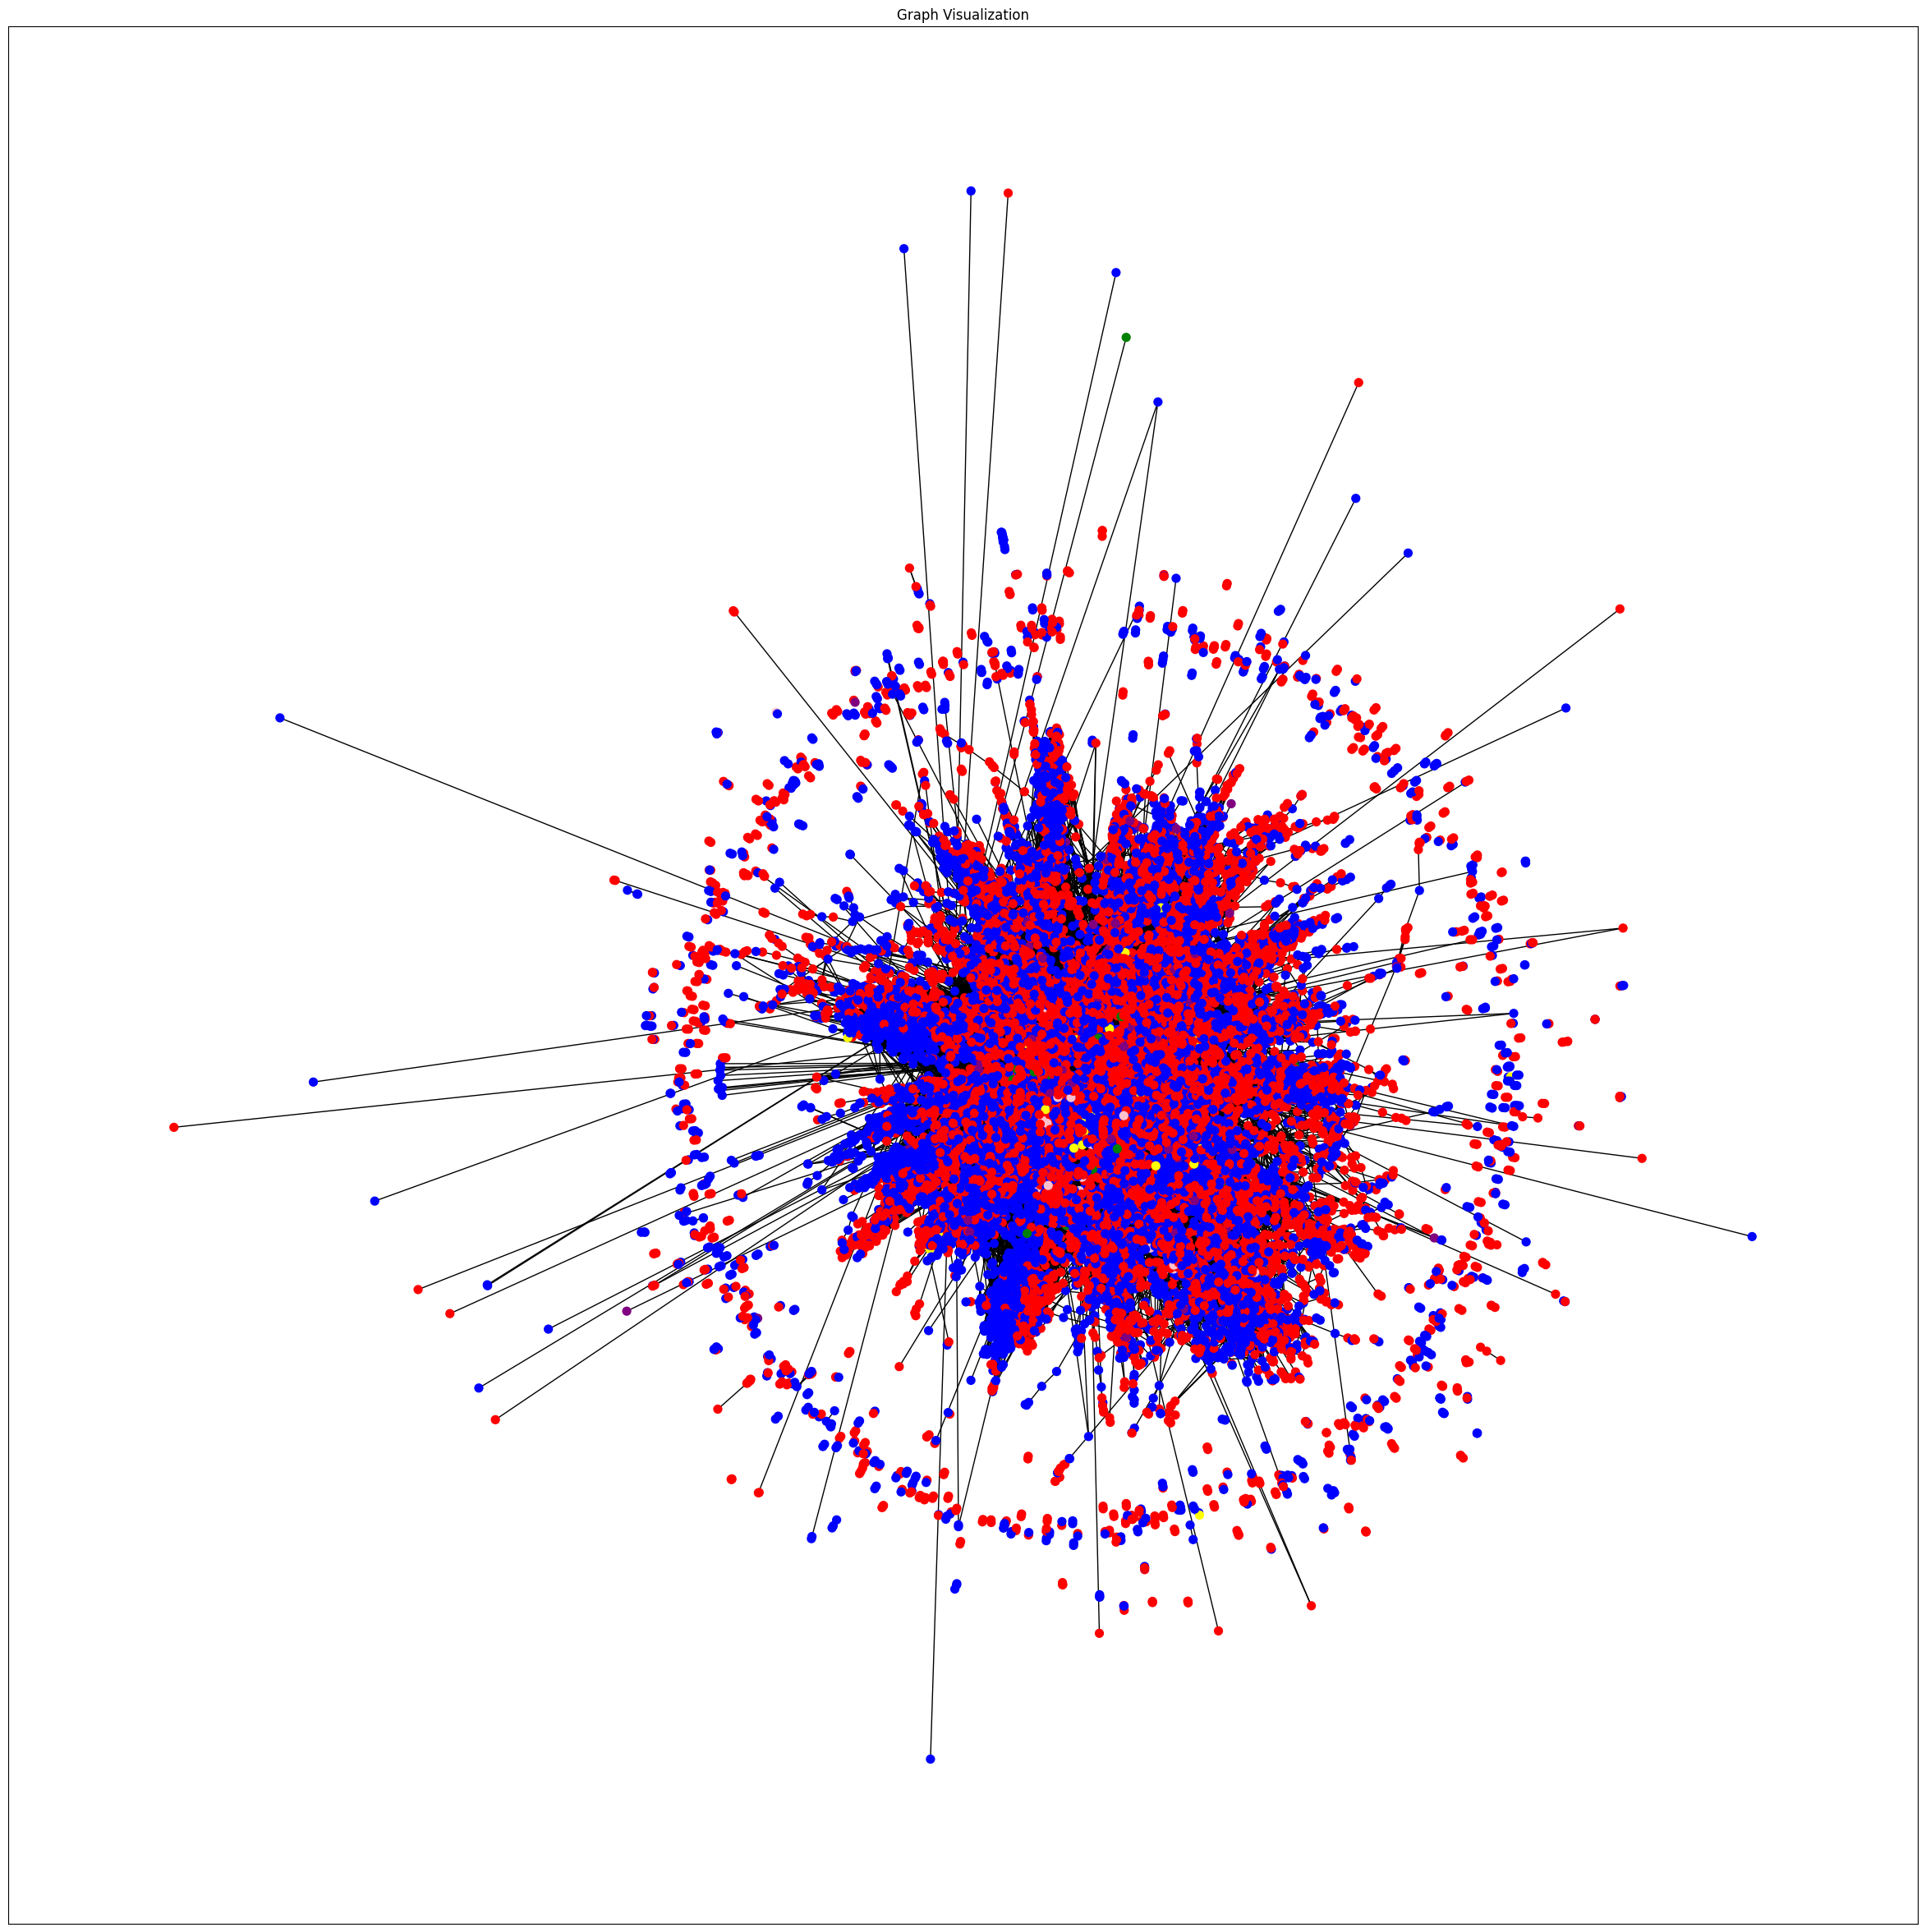

In [8]:
# Plot the graph
plt.figure(figsize=(30, 30))
nx.draw_networkx(
    P, pos=positions, with_labels=False, node_size=50, node_color=colors, cmap=plt.cm.jet
)
plt.title("Graph Visualization")
plt.show()

## party partition is different?

In [ ]:
# partition the graph after genre attribute using party genre. 
partition = {}

for node in G.nodes(data=True):
    genre = node[1]['party'] # Select the first genre
    if genre not in partition:
        partition[genre] = [node[0]]
    else:
        partition[genre].append(node[0])


# Gender

In [10]:
Gender_graph = H.copy()

colors = []
for node in Gender_graph.nodes():
    if Gender_graph.nodes[node]['gender'] == 'female':
        colors.append('purple')
    else:
        colors.append('green')   

In [11]:
# Initialize ForceAtlas2 layout
forceatlas2 = ForceAtlas2(
    # Behavior alternatives
    outboundAttractionDistribution=True,  # Dissuade hubs
    linLogMode=False,  # linear attraction (default)
    adjustSizes=False,  # Prevent overlap
    edgeWeightInfluence=1.0,

    # Performance and scaling
    jitterTolerance=1.0,  # Tolerance
    barnesHutOptimize=True,  # Optimize for larger graphs
    barnesHutTheta=1.2,
    scalingRatio=4.0,
    strongGravityMode=False,
    gravity=0.8,
    # Log
    verbose=True
)

# Apply the ForceAtlas2 layout to the graph
positions = forceatlas2.forceatlas2_networkx_layout(Gender_graph, iterations=100)

100%|██████████| 100/100 [05:55<00:00,  3.56s/it]

BarnesHut Approximation  took  39.81  seconds
Repulsion forces  took  312.06  seconds
Gravitational forces  took  0.39  seconds
Attraction forces  took  0.38  seconds
AdjustSpeedAndApplyForces step  took  1.59  seconds


C:\Users\Mathilde\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\networkx\drawing\nx_pylab.py:433: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


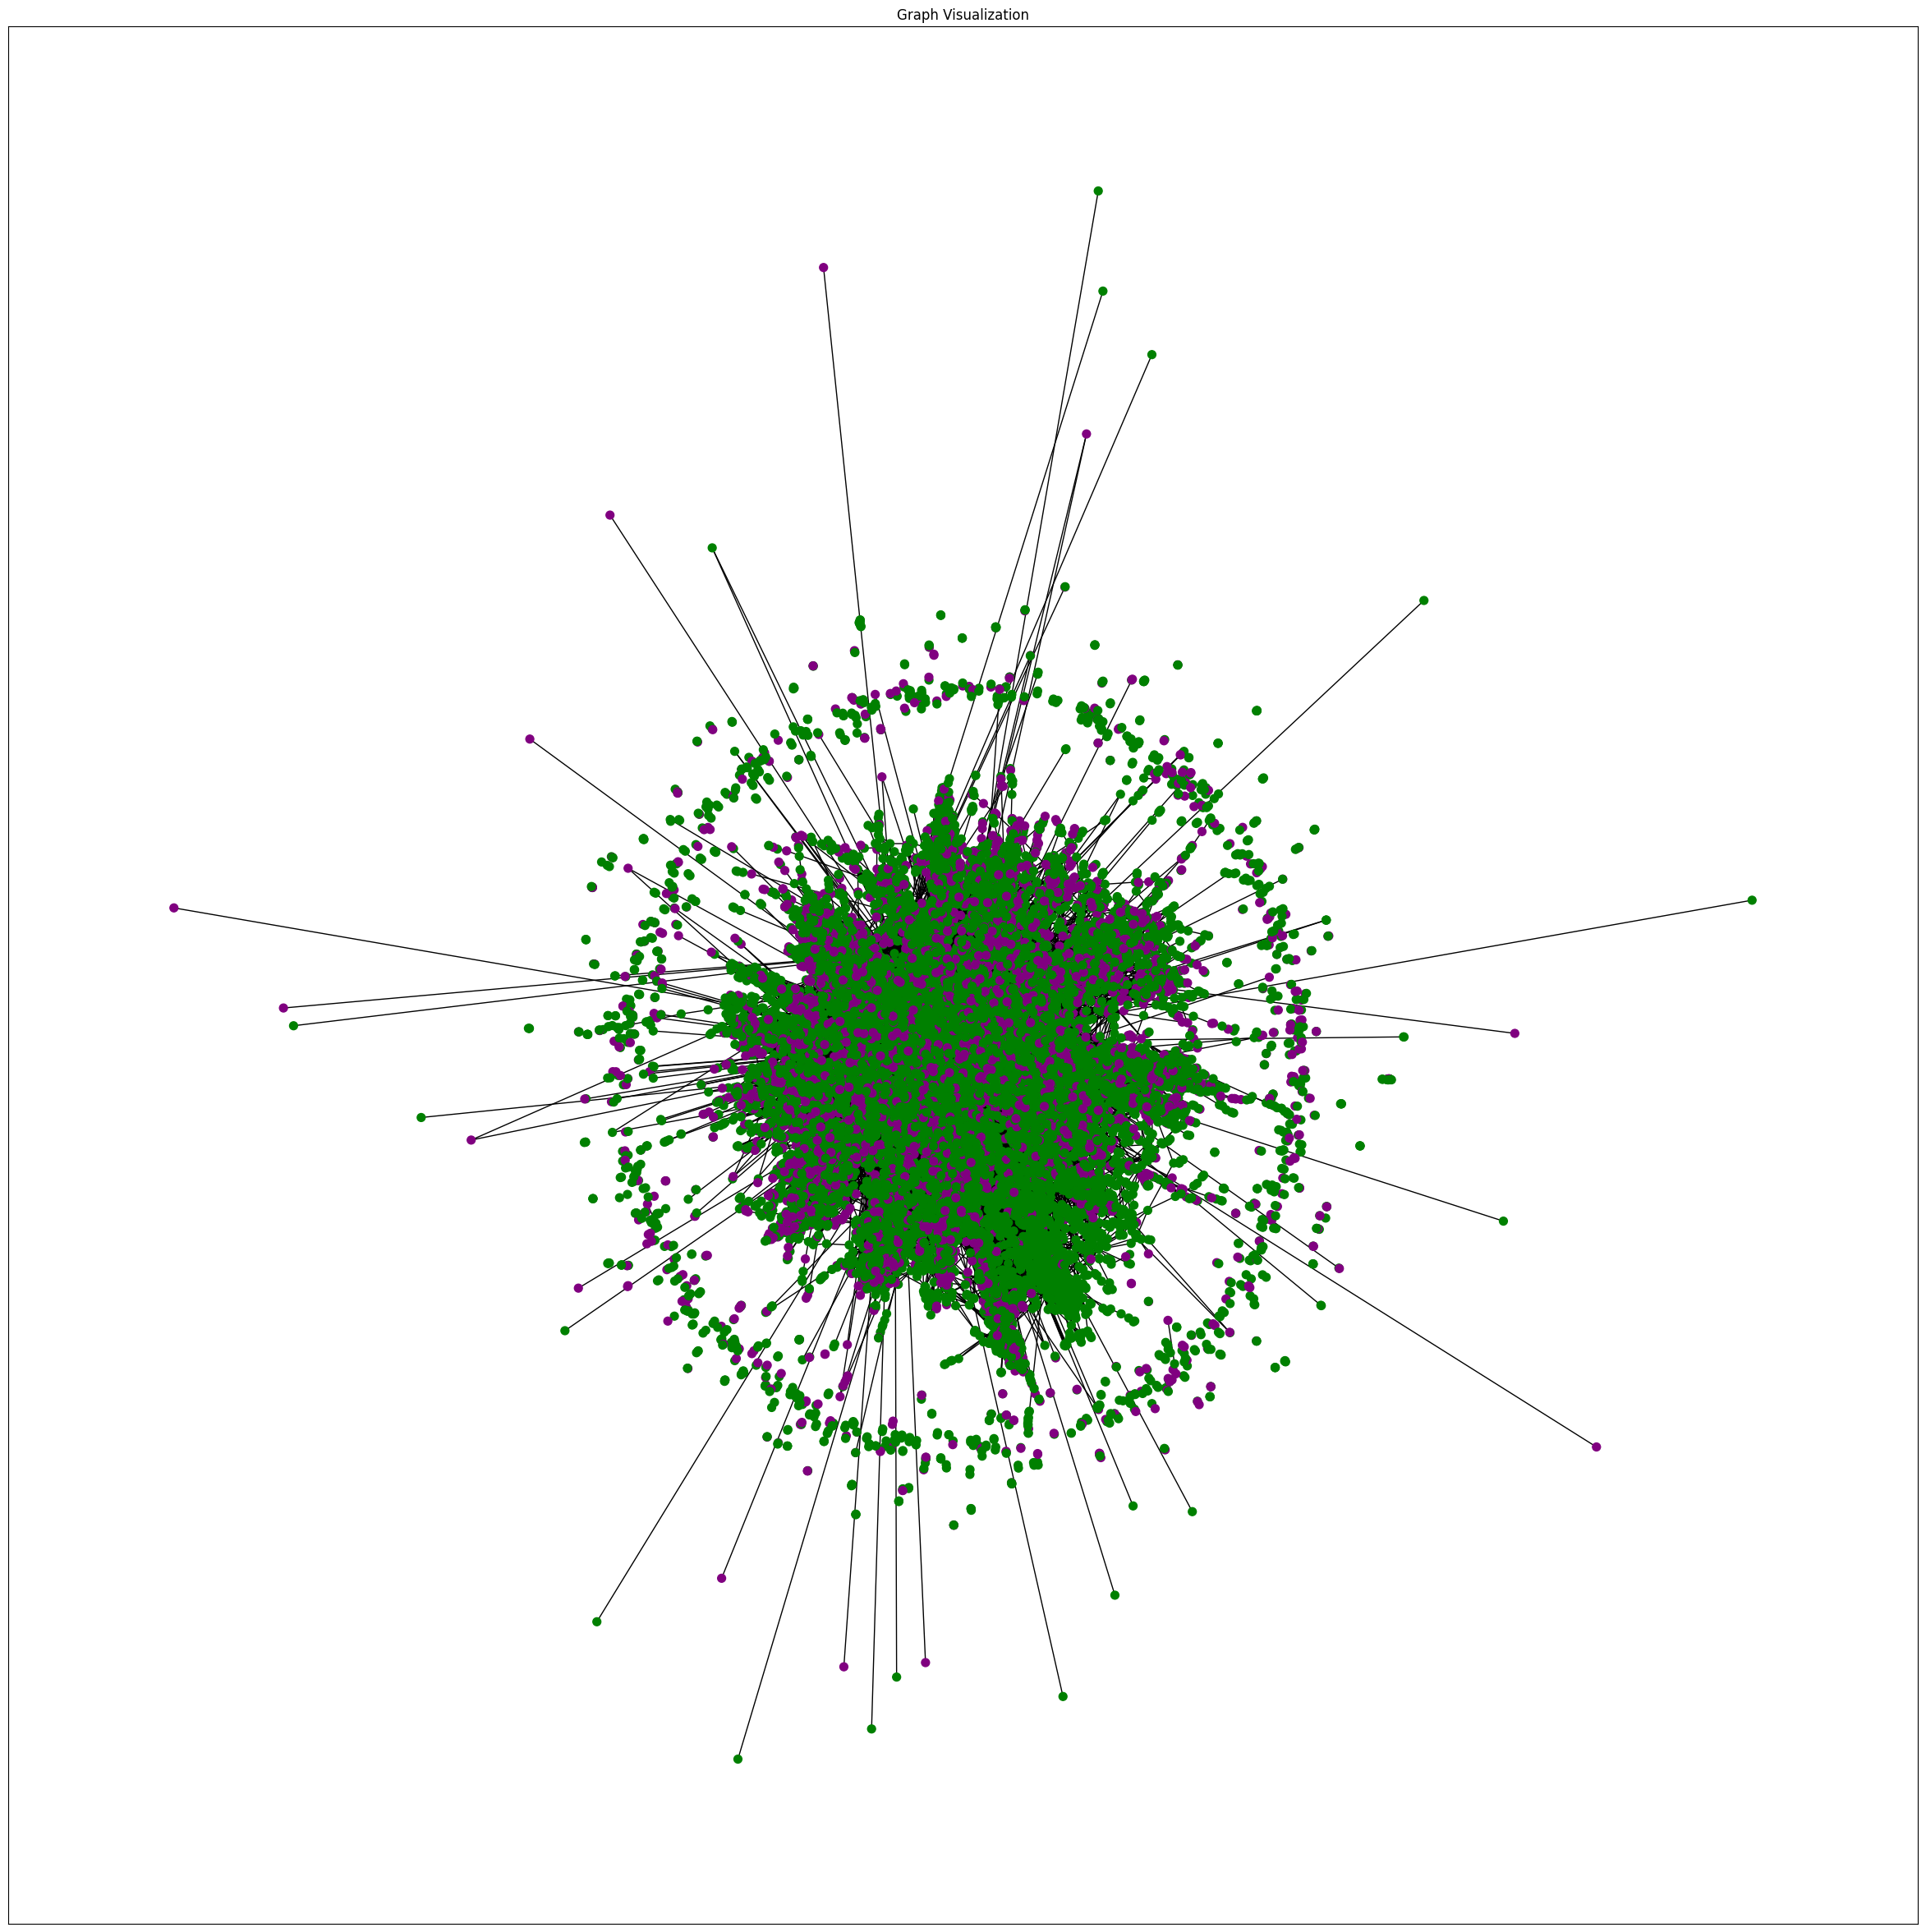

In [12]:
# Plot the graph
plt.figure(figsize=(30, 30))
nx.draw_networkx(
    Gender_graph, pos=positions, with_labels=False, node_size=50, node_color=colors, cmap=plt.cm.jet
)
plt.title("Graph Visualization")
plt.show()

# Louvain

In [29]:
L = H.copy()

# use louvain method to partition the graph
partition = nx.community.louvain_communities(L)

community_sizes = [len(community) for community in partition]
largest_communities_indices = np.argsort(community_sizes)[-7:]
largest_communities = [partition[i] for i in largest_communities_indices]

In [30]:
# colour after 5 biggest communities
colors = []
nodes_to_remove = []

for node in L.nodes():
    for i, community in enumerate(largest_communities):
        if node in community:
            colors.append(i)
            break
    else:
        nodes_to_remove.append(node)

L.remove_nodes_from(nodes_to_remove)

In [31]:
# Initialize ForceAtlas2 layout
forceatlas2 = ForceAtlas2(
    # Behavior alternatives
    outboundAttractionDistribution=True,  # Dissuade hubs
    linLogMode=False,  # linear attraction (default)
    adjustSizes=False,  # Prevent overlap
    edgeWeightInfluence=1.0,

    # Performance and scaling
    jitterTolerance=1.0,  # Tolerance
    barnesHutOptimize=True,  # Optimize for larger graphs
    barnesHutTheta=1.2,
    scalingRatio=4.0,
    strongGravityMode=False,
    gravity=0.8,
    # Log
    verbose=True
)

# Apply the ForceAtlas2 layout to the graph
positions = forceatlas2.forceatlas2_networkx_layout(L, iterations=100)

100%|██████████| 100/100 [01:38<00:00,  1.01it/s]

BarnesHut Approximation  took  14.86  seconds
Repulsion forces  took  82.53  seconds
Gravitational forces  took  0.17  seconds
Attraction forces  took  0.10  seconds
AdjustSpeedAndApplyForces step  took  0.58  seconds


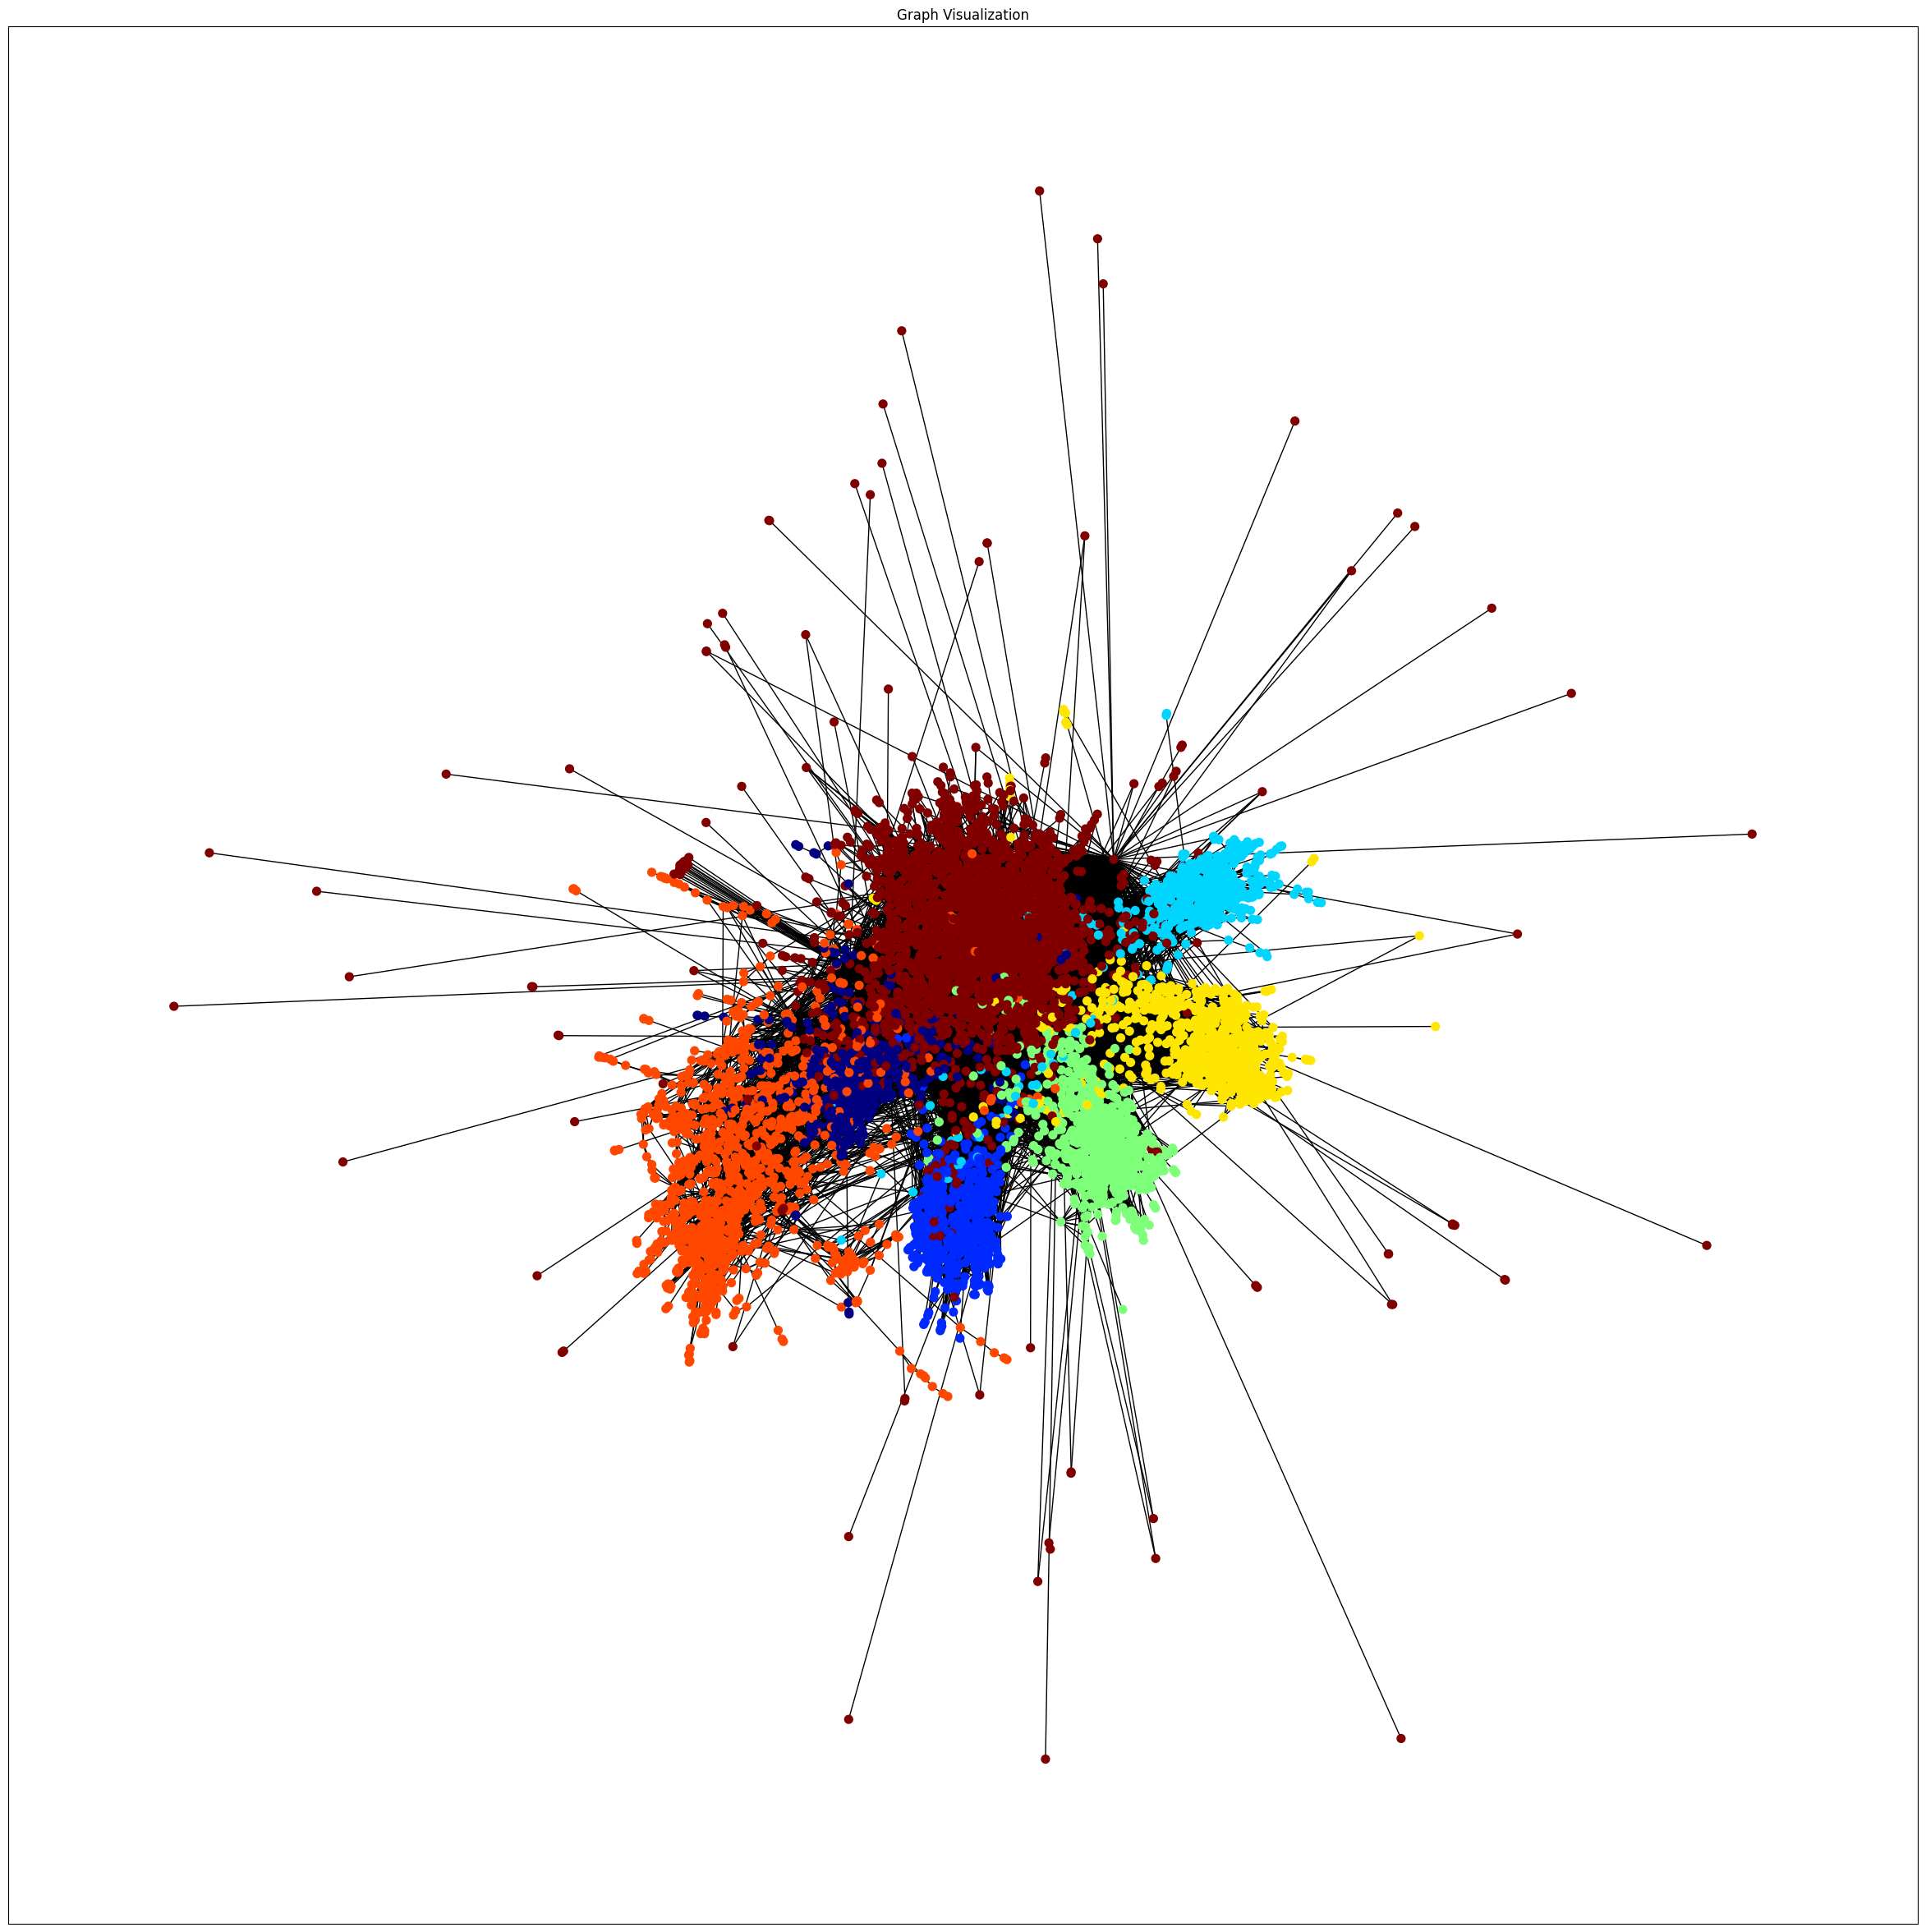

In [32]:
# Plot the graph
plt.figure(figsize=(30, 30))
nx.draw_networkx(
    L, pos=positions, with_labels=False, node_size=50, node_color=colors, cmap=plt.cm.jet
)
plt.title("Graph Visualization")
plt.show()

# Largest in - degree

In [33]:
H = G.to_undirected()

In [34]:
# Initialize ForceAtlas2 layout
forceatlas2 = ForceAtlas2(
    # Behavior alternatives
    outboundAttractionDistribution=True,  # Dissuade hubs
    linLogMode=False,  # linear attraction (default)
    adjustSizes=False,  # Prevent overlap
    edgeWeightInfluence=1.0,

    # Performance and scaling
    jitterTolerance=1.0,  # Tolerance
    barnesHutOptimize=True,  # Optimize for larger graphs
    barnesHutTheta=1.2,
    scalingRatio=4.0,
    strongGravityMode=False,
    gravity=0.8,
    # Log
    verbose=True
)

# Apply the ForceAtlas2 layout to the graph
positions = forceatlas2.forceatlas2_networkx_layout(H, iterations=100)

100%|██████████| 100/100 [05:17<00:00,  3.18s/it]

BarnesHut Approximation  took  37.69  seconds
Repulsion forces  took  276.80  seconds
Gravitational forces  took  0.27  seconds
Attraction forces  took  0.22  seconds
AdjustSpeedAndApplyForces step  took  1.61  seconds


In [35]:
In_degrees = dict(G.in_degree())
Out_degrees = dict(G.out_degree())

C:\Users\Mathilde\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\networkx\drawing\nx_pylab.py:433: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


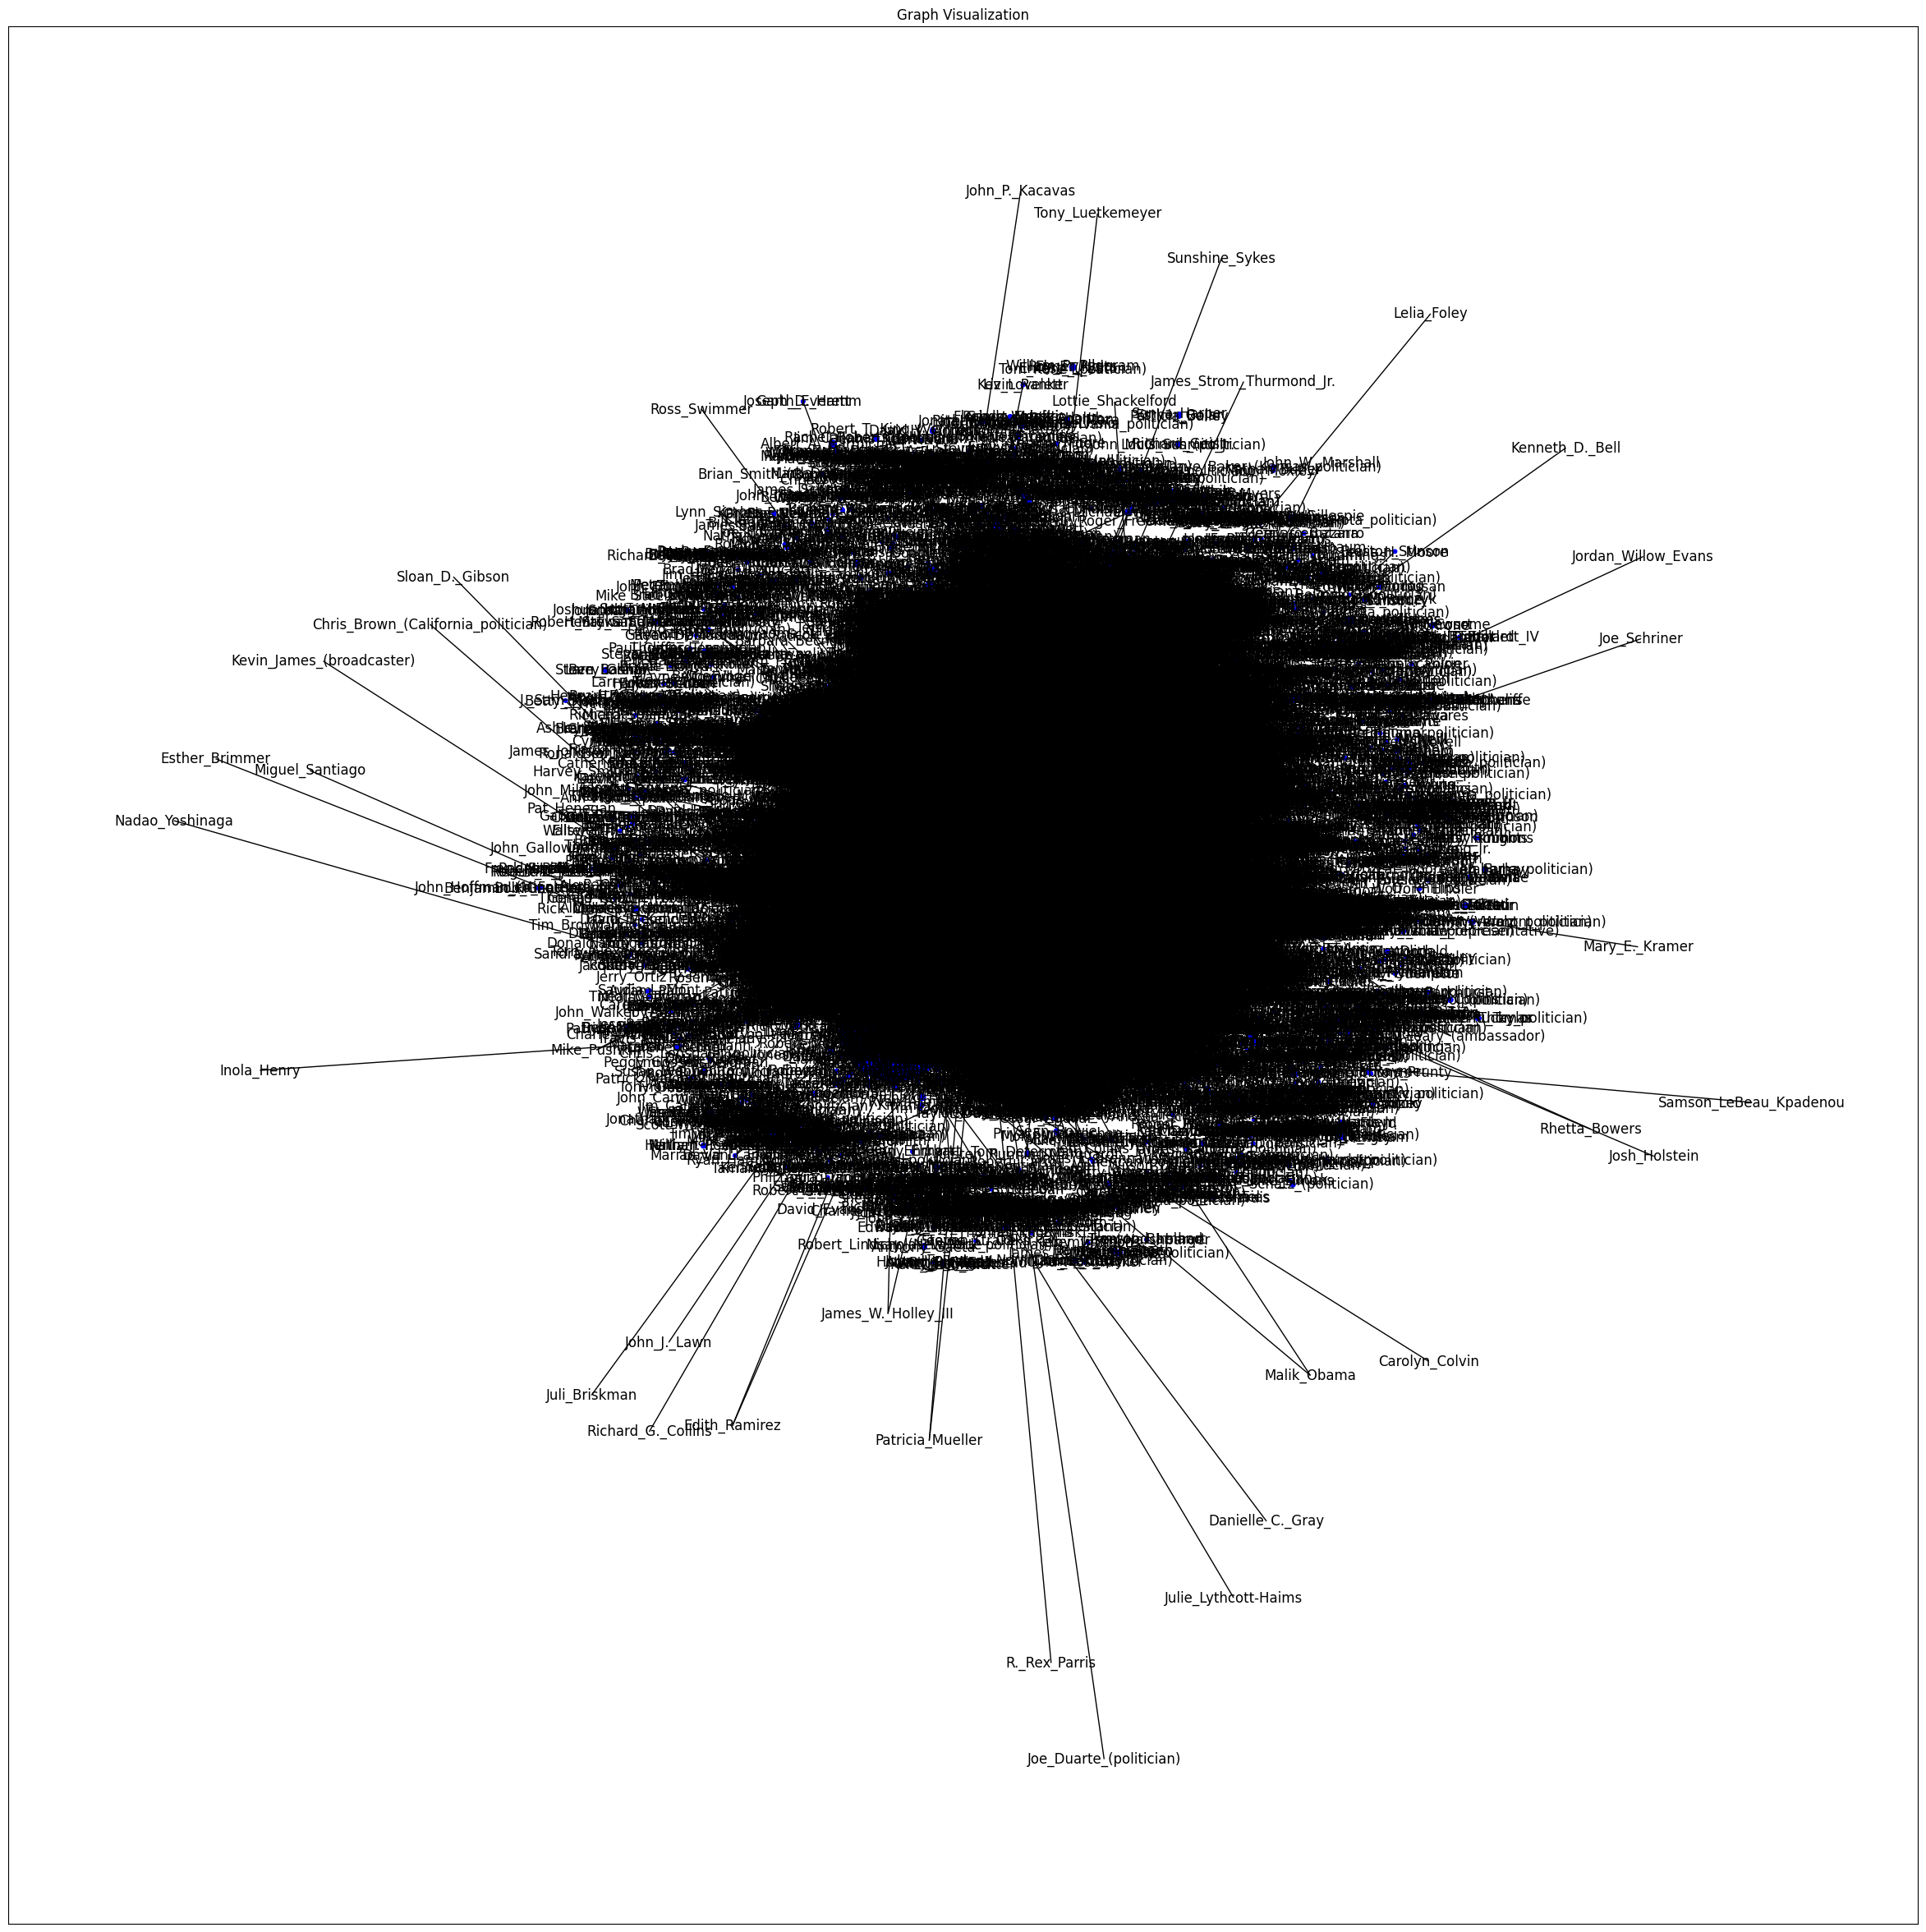

In [38]:
# Plot the graph
plt.figure(figsize=(30, 30))
nx.draw_networkx(
    H, pos=positions, with_labels={node: True if In_degrees[node] > 500 else False for node in G.nodes()}, node_size=[v * 10 for v in In_degrees.values()], node_color='blue', cmap=plt.cm.jet
)
plt.title("Graph Visualization")
plt.show()